In [68]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
from cliffs_delta import cliffs_delta

In [69]:
# Read participant csv file
df_participant = pd.read_csv('participant_data.csv')

# Read eyetrack data
df_eyetrack = pd.read_csv('eyetrack_data.tsv', sep='\t', header=0)

# Remove the columns that are not needed
df_eyetrack = df_eyetrack.drop(columns=['Recording', 'Gender', 'Timeline', 'TOI', 'Interval'])

# Delete all rows for participant "Test Participant"
df_eyetrack = df_eyetrack[df_eyetrack['Participant'] != 'Test Participant']

In [70]:
# Divide df_participant into two dataframes based on the Base Language column
df_participant_java = df_participant[df_participant['Base Language'] == 'Java']

df_participant_python = df_participant[df_participant['Base Language'] == 'Python']

In [71]:
# Further divisions

# Select only the partipants with the following base grade range
#grade_range = [3, 4]
#df_participant_java = df_participant_java[df_participant_java['Base Grade'].between(grade_range[0], grade_range[1])]
#df_participant_python = df_participant_python[df_participant_python['Base Grade'].between(grade_range[0], grade_range[1])]

# Select only the partipants with "Python Freq" = 1 (who do not have Python as their background)
df_participant_java = df_participant_java[df_participant_java['Python Freq'] <= 1]

<Axes: >

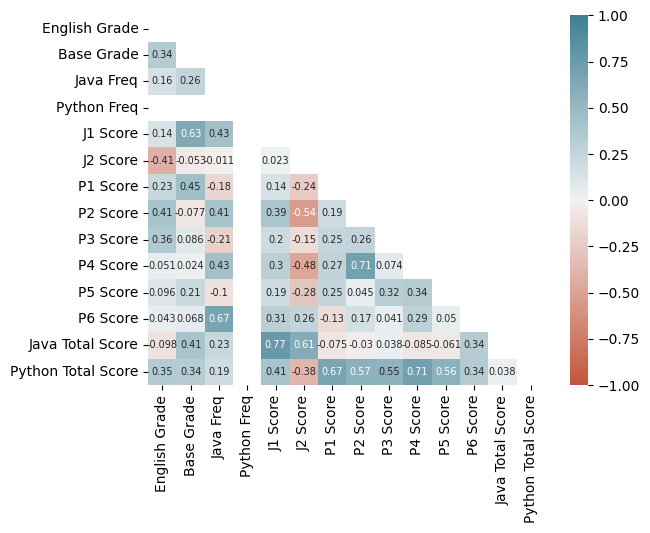

In [72]:
# Add total score column for each participant
df_participant_java['Java Total Score'] = df_participant_java['J1 Score'] + df_participant_java['J2 Score']
df_participant_java['Python Total Score'] = df_participant_java['P1 Score'] + df_participant_java['P2 Score'] + df_participant_java['P3 Score'] + df_participant_java['P4 Score'] + df_participant_java['P5 Score'] + df_participant_java['P6 Score'] 

# Compute Spearman correlation coefficients as we are dealing non-normal data 
corrmat = df_participant_java.corr(numeric_only=True, method='spearman')
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(20,220,as_cmap=True))

<Axes: >

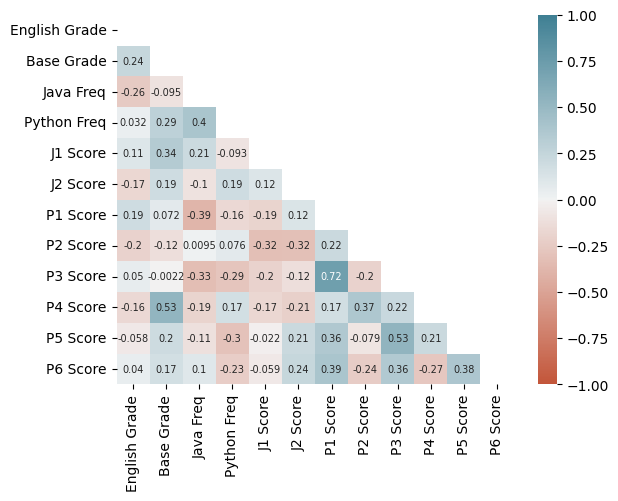

In [73]:
corrmat = df_participant_python.corr(numeric_only=True)
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(20,220,as_cmap=True))

In [74]:
# List the metric columns
metrics = ['Total_duration_of_fixations', 
           'Average_duration_of_fixations', 
           'Number_of_fixations', 
           'Time_to_first_fixation', 
           'Duration_of_first_fixation', 
           'Average_pupil_diameter'
           ]

# Pivot the data into a 3-level table, make the index the Participant column
df_eyetrack = df_eyetrack.pivot_table(index='Participant', 
                                columns=['Media','AOI'], 
                                values= metrics)

# Impute the missing values with the mean of the column
df_eyetrack = df_eyetrack.fillna(df_eyetrack.mean())

# Divide df_eyetrack into two dataframes based on whether the partipant's base language is Java or Python
df_eyetrack_java = df_eyetrack.loc[df_participant_java['Participant']]
df_eyetrack_python = df_eyetrack.loc[df_participant_python['Participant']]


The correlation coefficient, p-value and standard error for the graph of Java Test Scores are:
Java Students: 0.55771170029303 0.030753729506317416 0.15719563192086086
Python Students: 0.34255903067014154 0.23055086101197478 0.2585269844901899
The correlation coefficient, p-value and standard error for the graph of Python Syntax Scores are:
Java Students: 0.2754238863913633 0.32043549569661556 0.31492066971167504
Python Students: -0.019379068735406502 0.947573075824164 0.3498401247895442
The correlation coefficient, p-value and standard error for the graph of Python Semantics Scores are:
Java Students: 0.12941869509576417 0.6457360726548573 0.2923117942764981
Python Students: 0.3529329739398334 0.21580862453338726 0.2496279213819
The correlation coefficient, p-value and standard error for the graph of Python Comprehension Scores are:
Java Students: 0.1842743072590631 0.5108963822254734 0.1894230464632338
Python Students: 0.22259446802648192 0.44433441325594025 0.2321883966948007


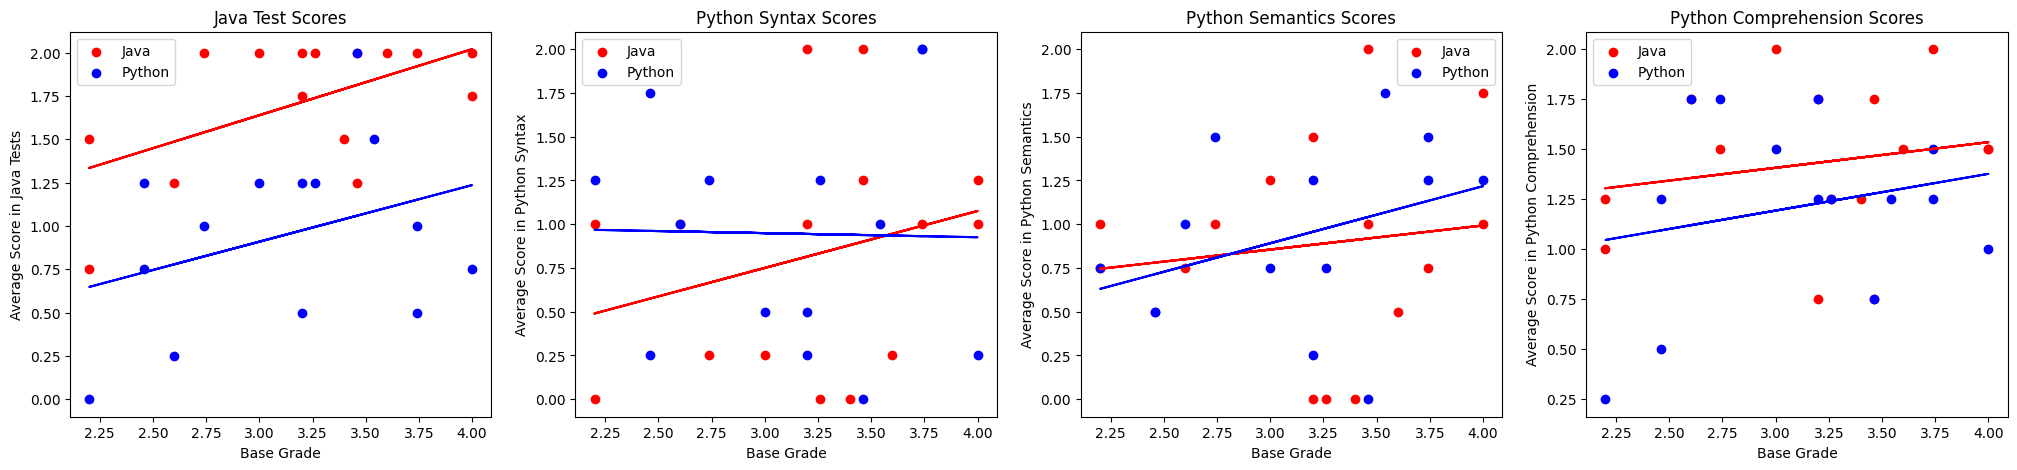

In [75]:
# Plotting graphs for Java/Python participant grades vs their scores
x1 = df_participant_java["Base Grade"]
x2 = df_participant_python["Base Grade"]

# Parameter variables prefixed with j_ indicate Java participant data and p_ indicate Python participant data

scores = ['J1 Score', 'J2 Score']
j_avg_jscores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_jscores = df_participant_python.loc[:, scores].mean(axis = 1)

scores = ['P1 Score', 'P2 Score']
j_avg_psyn_scores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_psyn_scores = df_participant_python.loc[:, scores].mean(axis = 1)

scores = ['P3 Score', 'P4 Score']
j_avg_psem_scores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_psem_scores = df_participant_python.loc[:, scores].mean(axis = 1)

scores = ['P5 Score', 'P6 Score']
j_avg_pcomp_scores = df_participant_java.loc[:, scores].mean(axis = 1)
p_avg_pcomp_scores = df_participant_python.loc[:, scores].mean(axis = 1)

# Create 4 subplots of scatter graphs
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

subplot_params = [
    [j_avg_jscores, p_avg_jscores,'Java Test Scores', 'Average Score in Java Tests'],
    [j_avg_psyn_scores, p_avg_psyn_scores, 'Python Syntax Scores', 'Average Score in Python Syntax'],
    [j_avg_psem_scores, p_avg_psem_scores, 'Python Semantics Scores', 'Average Score in Python Semantics'],
    [j_avg_pcomp_scores, p_avg_pcomp_scores, 'Python Comprehension Scores', 'Average Score in Python Comprehension']
]

for i in range(len(subplot_params)):
    y1 = subplot_params[i][0]
    y2 = subplot_params[i][1]
    #m1, b1 = np.polyfit(x1, y1, 1)
    #m2, b2 = np.polyfit(x2, y2, 1)
    m1, b1, r1, p1, std_err1 = stats.linregress(x1, y1)
    m2, b2, r2, p2, std_err2 = stats.linregress(x2, y2)
    axs[i].set_title(subplot_params[i][2])
    axs[i].scatter(x1, y1, color='red')
    axs[i].scatter(x2, y2, color='blue')
    axs[i].plot(x1, m1*x1 + b1, color='red')
    axs[i].plot(x2, m2*x2 + b2, color='blue')
    axs[i].set_xlabel('Base Grade')
    axs[i].set_ylabel(subplot_params[i][3])
    axs[i].legend(['Java', 'Python'])
    print("The correlation coefficient, p-value and standard error for the graph of", subplot_params[i][2], "are:")
    print("Java Students:", r1, p1, std_err1)
    print("Python Students:", r2, p2, std_err2)

plt.show()
    



In [76]:
# Compute Two sample t-tests for all the scores
for i in range(4):
    t_test, p_value = stats.ttest_ind(subplot_params[i][0], subplot_params[i][1])
    print(f'{subplot_params[i][2]}: t-test = {t_test}, p-value = {p_value}')

Java Test Scores: t-test = 4.489212433614014, p-value = 0.00012011371304325283
Python Syntax Scores: t-test = -0.5193488825437091, p-value = 0.6077490349818429
Python Semantics Scores: t-test = -0.2164943779519981, p-value = 0.8302298419240484
Python Comprehension Scores: t-test = 1.3814916650675966, p-value = 0.17845401383804738


In [77]:
# Compute Mann-Whitney U-tests for all the scores
for i in range(4):
    # Compute Shapiro-Wilk test to test for non-normality
    #print(f'{subplot_params[i][2]}: Shapiro-Wilk test for Java = {stats.shapiro(subplot_params[i][0])}')
    #print(f'{subplot_params[i][2]}: Shapiro-Wilk test for Python = {stats.shapiro(subplot_params[i][1])}')
    print(f'{subplot_params[i][2]}: U-test = {stats.mannwhitneyu(x=subplot_params[i][0], y=subplot_params[i][1], alternative = "greater")}\n')

Java Test Scores: U-test = MannwhitneyuResult(statistic=np.float64(184.0), pvalue=np.float64(0.0002341312176104256))

Python Syntax Scores: U-test = MannwhitneyuResult(statistic=np.float64(89.0), pvalue=np.float64(0.7679519754528149))

Python Semantics Scores: U-test = MannwhitneyuResult(statistic=np.float64(100.0), pvalue=np.float64(0.5958276611691239))

Python Comprehension Scores: U-test = MannwhitneyuResult(statistic=np.float64(133.5), pvalue=np.float64(0.10622894521669746))



In [86]:
# Prepare eyetracking metrics
metrics = df_eyetrack.columns.levels[0]

# Get the AOIs for each media
aois = df_eyetrack.columns.levels[1]

to_remove = ['Participant', 'Media', 'AOI']
metrics = [metric for metric in metrics if metric not in to_remove]

In [79]:
# For each of the eye-track metrics, compare between Java and Python participants
tests_aoi = [
    ['py1syn', 'BugIsHere'],
    ['py2syn', 'BugIsHere'],
    ['py1sem', 'BugIsHere'],
    ['py2sem', 'BugIsHere']
]

for test in tests_aoi:
    for metric in metrics:
        j_metric = df_eyetrack_java[metric][test[0]][test[1]]
        j_metric_avg = j_metric.mean()
        p_metric = df_eyetrack_python[metric][test[0]][test[1]]
        p_metric_avg = p_metric.mean()
        #t_test, p_value = stats.ttest_ind(j_metric, p_metric)
        #print(f'{metric} for {test}: t-test = {t_test}, p-value = {p_value}, avg Java = {j_metric_avg}, avg Python = {p_metric_avg}')
        print(f'{metric} for {test}: U-test = {stats.mannwhitneyu(x=j_metric, y=p_metric, alternative = "greater")}\n')
    print('\n')

Average_duration_of_fixations for ['py1syn', 'BugIsHere']: U-test = MannwhitneyuResult(statistic=np.float64(115.5), pvalue=np.float64(0.3305540870590993))

Average_pupil_diameter for ['py1syn', 'BugIsHere']: U-test = MannwhitneyuResult(statistic=np.float64(84.0), pvalue=np.float64(0.8270080582653834))

Duration_of_first_fixation for ['py1syn', 'BugIsHere']: U-test = MannwhitneyuResult(statistic=np.float64(112.0), pvalue=np.float64(0.38784145698255745))

Number_of_fixations for ['py1syn', 'BugIsHere']: U-test = MannwhitneyuResult(statistic=np.float64(91.5), pvalue=np.float64(0.7307097477588372))

Time_to_first_fixation for ['py1syn', 'BugIsHere']: U-test = MannwhitneyuResult(statistic=np.float64(103.0), pvalue=np.float64(0.543629677659593))

Total_duration_of_fixations for ['py1syn', 'BugIsHere']: U-test = MannwhitneyuResult(statistic=np.float64(88.0), pvalue=np.float64(0.778510205009343))



Average_duration_of_fixations for ['py2syn', 'BugIsHere']: U-test = MannwhitneyuResult(statisti

In [108]:
# Create a new csv file to store Mann-Whitney U-test results
with open('mannwhitneyu_results.csv', 'w') as f:
    f.write('Metric,Media,AOI,Java Avg, Python Avg, Java Median, Python Median, U-statistic,p-value, cliff_delta\n')

# For each metric, media, and AOI, compare between Java and Python participants
for metric in metrics:
    for media in df_eyetrack[metric].columns.levels[0]:
        for aoi in df_eyetrack[metric][media].columns:
            j_metric = df_eyetrack_java[metric][media][aoi]
            j_metric_avg = j_metric.mean()
            j_metric_median = j_metric.median()
            p_metric = df_eyetrack_python[metric][media][aoi]
            p_metric_avg = p_metric.mean()
            p_metric_median = p_metric.median()
            mwtest = stats.mannwhitneyu(x=j_metric, y=p_metric, alternative = "greater")

            # Compute Cliff's delta
            cliff = cliffs_delta(j_metric, p_metric)

            print(f'{metric} for {media} and {aoi}: U-test = {mwtest}\n')
            # Save Mann-Whitney U-test results to a csv file
            with open('mannwhitneyu_results.csv', 'a') as f:
                f.write(f'{metric},{media},{aoi},{j_metric_avg}, {p_metric_avg}, {j_metric_median}, {p_metric_median}, {mwtest[0]},{mwtest[1]}, {cliff[0]}\n')

        print('\n')

AttributeError: module 'scipy.stats' has no attribute 'cliffsDelta'

In [81]:
# For each of the eye-track metrics, compare between pysyn and pysem for all participants
for metric in metrics:
    py1syn = df_eyetrack[metric]['py1syn']['BugIsHere']
    py2syn = df_eyetrack[metric]['py2syn']['BugIsHere']
    pysyn = (py1syn + py2syn) / 2
    pysyn_avg = pysyn.mean()
    py1sem = df_eyetrack[metric]['py1sem']['BugIsHere']
    py2sem = df_eyetrack[metric]['py2sem']['BugIsHere']
    pysem = (py1sem + py2sem) / 2
    pysem_avg = pysem.mean()
    #t_test, p_value = stats.ttest_ind(pysyn, pysem, nan_policy='omit')
    #print(f'{metric}: t-test = {t_test}, p-value = {p_value}, avg pysyn = {pysyn_avg}, avg pysem = {pysem_avg}')
    
    # Perform Shapiro-Wilk test to test for non-normality
    #print(f'{metric}: Shapiro-Wilk test for pysyn = {stats.shapiro(pysyn.dropna())}')
    #print(f'{metric}: Shapiro-Wilk test for pysem = {stats.shapiro(pysem.dropna())}')

    # Perform Wilcoxon signed-rank test (since we're running them on the same participants but different conditions)
    # Missing data (18% - 6 of participants) is imputed with the mean of the column 
    print(f'{metric}: W-test = {stats.wilcoxon(x=pysyn, y=pysem, alternative = "greater")}\n')

Average_duration_of_fixations: W-test = WilcoxonResult(statistic=np.float64(513.0), pvalue=np.float64(4.8610614612698555e-05))

Average_pupil_diameter: W-test = WilcoxonResult(statistic=np.float64(460.0), pvalue=np.float64(0.0022954594460316002))

Duration_of_first_fixation: W-test = WilcoxonResult(statistic=np.float64(564.0), pvalue=np.float64(1.382431946694851e-07))

Number_of_fixations: W-test = WilcoxonResult(statistic=np.float64(67.5), pvalue=np.float64(0.9999894122011028))

Time_to_first_fixation: W-test = WilcoxonResult(statistic=np.float64(409.0), pvalue=np.float64(0.028521952917799354))

Total_duration_of_fixations: W-test = WilcoxonResult(statistic=np.float64(69.0), pvalue=np.float64(0.9999870345345698))



In [60]:
# Java vs Python all metrics for Python syntax  

for metric in metrics:
    j_py1sem = df_eyetrack_java[metric]['py1syn']['BugIsHere']
    j_py2sem = df_eyetrack_java[metric]['py2syn']['BugIsHere']
    j_avg_pysem = (j_py1sem + j_py2sem) / 2
    #avj_avg_pysem = j_avg_pysem.mean()
    p_py1sem = df_eyetrack_python[metric]['py1syn']['BugIsHere']
    p_py2sem = df_eyetrack_python[metric]['py2syn']['BugIsHere']
    p_avg_pysem = (p_py1sem + p_py2sem) / 2
    #pysem_avg = pysem.mean()
    t_test, p_value = stats.ttest_ind(j_avg_pysem, p_avg_pysem, nan_policy='omit')
    print(f'{metric}: t-test = {t_test}, p-value = {p_value}')


Average_duration_of_fixations: t-test = -0.5932329443329118, p-value = 0.5579623898129842
Average_pupil_diameter: t-test = -1.0120546872462952, p-value = 0.32049603158735157
Duration_of_first_fixation: t-test = 1.045003276057125, p-value = 0.3052875577794196
Number_of_fixations: t-test = 1.279225088600556, p-value = 0.2117027126181027
Time_to_first_fixation: t-test = -1.1930596535292217, p-value = 0.2432249256570605
Total_duration_of_fixations: t-test = 0.9066139333464401, p-value = 0.37263142309881436
